In [1]:
from data import PlasmaDataset, generate_datasets, post_hoc_collate_fn, viewmaker_collate_fn, distort_dataset
from models import PlasmaLSTM, PlasmaViewEncoderTransformer, DecompTimeSeriesViewMaker, LSTMFormer
import os
from torch.utils.data import DataLoader
import torch
import copy
from eval import compute_metrics, plot_view, compute_metrics_after_training
from train import train_post_hoc, ViewMakerTrainer
import arg_parsing
import utils
from utils import seed_everything
from post_hoc import compare_aug_no_aug
from lightning import Fabric

In [2]:
file_name = 'Full_HDL_dataset_unnormalized_no_nan_column_names_w_shot.pickle'
train_dataset, test_dataset, val_dataset = generate_datasets(file_name,0.1,0.1,included_machines=['cmod','east'], new_machine='cmod',case=1, balance=True)

In [5]:
viewmaker_args = {
    "n_dim": 12,
    "n_layers": 4,
    "activation": torch.nn.ReLU(),
    "default_distortion_budget": 1,
    "hidden_dim":48,
    "layer_type": 'transformer',
    "n_head": 1,
}

viewmaker = DecompTimeSeriesViewMaker(**viewmaker_args)

AssertionError: embed_dim must be divisible by num_heads

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def plot_ts(data):
    fig, ax = plt.subplots(4,3)
    for i in range(12):
        idx1 = i%4
        idx2 = i//4
        ax[idx1][idx2].plot(np.transpose(data.squeeze().cpu().detach().numpy()[:,i]))

    plt.show()
def plot_ts_v_ts(data1, data2):
    fig, ax = plt.subplots(4,3)
    for i in range(12):
        idx1 = i%4
        idx2 = i//4
        ax[idx1][idx2].plot(np.transpose(data1.squeeze().cpu().detach().numpy()[:,i]))
        ax[idx1][idx2].plot(np.transpose(data2.squeeze().cpu().detach().numpy()[:,i]))

    plt.show() 

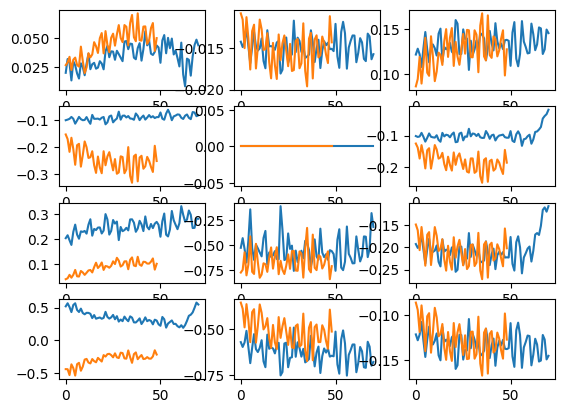

In [6]:
plot_ts_v_ts(test_dataset[0]['inputs_embeds'][:-test_dataset.cutoff_steps].unsqueeze(0).to(torch.device('cpu')),test_dataset[6]['inputs_embeds'][:-test_dataset.cutoff_steps].unsqueeze(0).to(torch.device('cpu')))

Error: You must call wandb.init() before wandb.log()

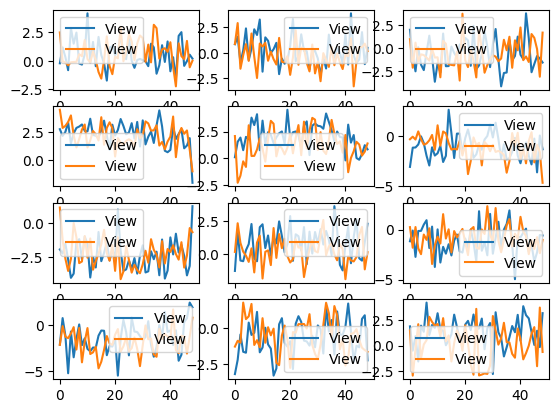

In [8]:
plot_view(viewmaker, test_dataset[6]['inputs_embeds'][:-test_dataset.cutoff_steps].unsqueeze(0).to(torch.device('cpu')))